<a href="https://colab.research.google.com/github/Dormundo/Teste-Data-ICMC/blob/master/modelo_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

class Modelo:
    def __init__(self):
        self.df = None
        self.model = None
        self.X_test = None
        self.y_test = None

    def CarregarDataset(self, path):
        """
        Carrega o conjunto de dados Iris a partir de um arquivo CSV.
        """
        colunas = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
        self.df = pd.read_csv(path, names=colunas)
        print("Dataset carregado com sucesso!")
        print(self.df.head())

    def TratamentoDeDados(self):
        """
        Realiza o pré-processamento dos dados carregados.
        """
        # Visualizar o início do dataset
        #print("\nVisualizando os dados iniciais:")
        #print(self.df.head())

        # Verificar e tratar valores ausentes
        if self.df.isnull().values.any():
            print("Tratando valores ausentes.")
            self.df.fillna(self.df.mean(numeric_only=True), inplace=True)

        # Codificar a coluna 'Species' para valores numéricos
        label_encoder = LabelEncoder()
        self.df['Species'] = label_encoder.fit_transform(self.df['Species'])
        self.label_encoder = label_encoder  # Guarda o codificador para decodificação posterior

        # Definir as features (X) e o rótulo (y)
        self.X = self.df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
        self.y = self.df['Species']

        # Gráfico de barras para as três espécies
        self.AnalisarDados()

    def AnalisarDados(self):
        """
        Gera um gráfico de barras comparando as médias das dimensões das flores para cada espécie.
        """
        species_means = self.df.groupby('Species').mean()
        species_names = self.label_encoder.inverse_transform(species_means.index)

        # Plot
        species_means.plot(kind='bar', figsize=(10, 6))
        plt.title("Médias das Dimensões para Cada Espécie de Flor")
        plt.xlabel("Espécie")
        plt.ylabel("Dimensão (cm)")
        plt.xticks(ticks=range(len(species_names)), labels=species_names, rotation=0)
        plt.legend(loc="upper right")
        plt.show()

    def Treinamento(self, modelo_escolhido="SVC"):
        """
        Treina o modelo de machine learning.
        """
        # Dividir o dataset em conjuntos de treino e teste
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

        # Escolha do modelo
        if modelo_escolhido == "SVC":
            self.model = SVC(kernel='linear')
        elif modelo_escolhido == "LinearRegression":
            self.model = LinearRegression()
        else:
            raise ValueError("Modelo não suportado. Escolha 'SVC' ou 'LinearRegression'.")

        # Treinar o modelo
        self.model.fit(X_train, y_train)
        print(f"Modelo {modelo_escolhido} treinado com sucesso.")

        # Validação cruzada para SVC
        if modelo_escolhido == "SVC":
            scores = cross_val_score(self.model, X_train, y_train, cv=5)
            print(f"Acurácia média na validação cruzada ({modelo_escolhido}): {scores.mean():.2f}")

        # Guarda o conjunto de teste para avaliação posterior
        self.X_test, self.y_test = X_test, y_test

    def Teste(self):
        """
        Avalia o desempenho do modelo treinado nos dados de teste.
        """
        y_pred = self.model.predict(self.X_test)

        # Avaliar as métricas do modelo
        if isinstance(self.model, SVC):
            accuracy = accuracy_score(self.y_test, y_pred)
            print(f"Acurácia do modelo SVC: {accuracy:.2f}")
            print("\nRelatório de Classificação:\n", classification_report(self.y_test, y_pred, target_names=self.label_encoder.classes_))
            print("Matriz de Confusão:\n", confusion_matrix(self.y_test, y_pred))

        elif isinstance(self.model, LinearRegression):
            mse = mean_squared_error(self.y_test, y_pred)
            print(f"Erro Médio Quadrático (MSE) da Regressão Linear: {mse:.2f}")

    def Train(self, path="iris.data", modelo_escolhido="SVC"):
        """
        Função principal para o fluxo de treinamento e avaliação do modelo.
        """
        print(f"\nTreinando o modelo {modelo_escolhido}...")
        self.CarregarDataset(path)
        self.TratamentoDeDados()
        self.Treinamento(modelo_escolhido)
        self.Teste()




Treinando o modelo SVC...
Dataset carregado com sucesso!
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


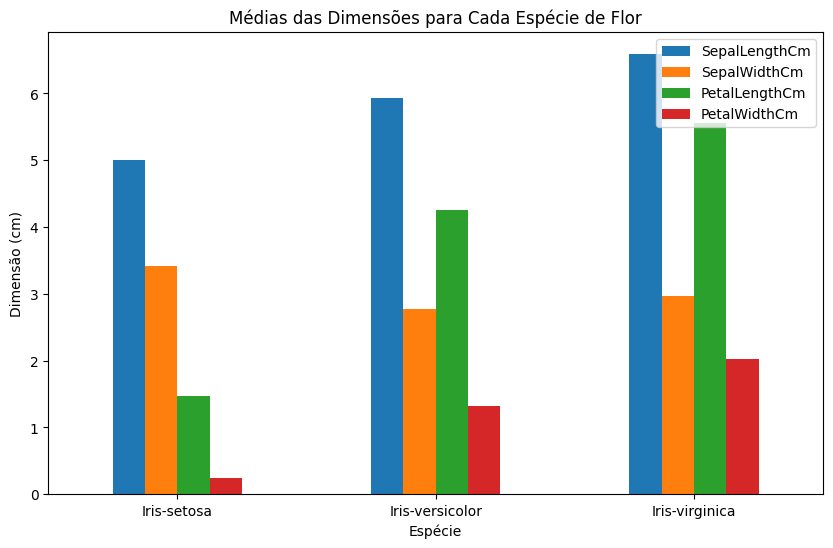

Modelo SVC treinado com sucesso.
Acurácia média na validação cruzada (SVC): 0.96
Acurácia do modelo SVC: 1.00

Relatório de Classificação:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Matriz de Confusão:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [10]:
# Exemplo de uso:
# Defina o caminho para o dataset Iris
caminho_dataset = "/content/drive/MyDrive/python usp/iris.data"

# Instancie e treine o modelo SVC
modelo_svc = Modelo()
modelo_svc.Train(path=caminho_dataset, modelo_escolhido="SVC")

# Instancie e treine o modelo de Regressão Linear
#modelo_lr = Modelo()
#modelo_lr.Train(path=caminho_dataset, modelo_escolhido="LinearRegression")
